## Análisis exploratorio de datos

Análisis Univariado
El análisis univariado se centra en el estudio de una sola variable a la vez. Su objetivo es entender la distribución, la tendencia central, la dispersión y la presencia de valores atípicos de esa variable. Los métodos y herramientas utilizados en el análisis univariado varían según el tipo de variable (numérica o categórica).

            Variables Numéricas
Medidas de Tendencia Central:

Media: El promedio de los valores. Mediana: El valor central en una distribución ordenada. Moda: El valor más frecuente en el conjunto de datos. Medidas de Dispersión:

Varianza: La media de las diferencias al cuadrado respecto a la media. Desviación estándar: La raíz cuadrada de la varianza. Rango: La diferencia entre el valor máximo y el mínimo. Percentiles y cuartiles: Valores que dividen la distribución en partes iguales. Gráficos:

Histogramas: Muestran la frecuencia de los valores en intervalos específicos. Boxplots (diagramas de caja): Representan la mediana, cuartiles y posibles valores atípicos. Distribución:

Análisis de la forma de la distribución: Asimetría y curtosis. Pruebas de normalidad: Shapiro-Wilk, Kolmogorov-Smirnov, entre otras.

             Variables Categóricas
Frecuencia:

Tablas de frecuencia: Cuenta de ocurrencias de cada categoría. Porcentajes: Proporción de cada categoría respecto al total. Gráficos:

Gráficos de barras: Visualización de la frecuencia de cada categoría. Gráficos de pastel: Representación proporcional de cada categoría.

Análisis Bivariado
El análisis bivariado estudia la relación entre dos variables. Dependiendo de los tipos de variables (numéricas o categóricas), se utilizan diferentes métodos y herramientas para explorar estas relaciones.

              Variables Numéricas
Correlación:

Coeficiente de correlación de Pearson: Mide la relación lineal entre dos variables numéricas. Coeficiente de correlación de Spearman: Mide la relación monotónica entre dos variables numéricas. Gráficos:

Scatter plots (diagramas de dispersión): Muestran la relación entre dos variables mediante puntos en un plano cartesiano. Heatmaps: Muestran la matriz de correlación de varias variables numéricas. Regresión Lineal:

Análisis de regresión: Modela la relación entre una variable dependiente y una o más variables independientes. Variables Categóricas Tablas de Contingencia:

Tablas cruzadas: Muestran la frecuencia conjunta de dos variables categóricas. Gráficos:

Gráficos de barras apiladas o agrupadas: Visualizan la distribución conjunta de dos variables categóricas. Pruebas Estadísticas:

Chi-cuadrado de independencia: Evalúa si existe una relación significativa entre dos variables categóricas. Variables Mixtas (Numéricas y Categóricas) Boxplots:

Comparan la distribución de una variable numérica entre las diferentes categorías de una variable categórica. Gráficos de violín:

Muestran la distribución de una variable numérica en diferentes categorías de una variable categórica, combinando boxplots y densidad de probabilidad. Análisis de Varianza (ANOVA):

Prueba estadística para comparar las medias de una variable numérica entre varias categorías de una variable categórica.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.stats import shapiro, kstest, norm, skew, kurtosis
import statsmodels.api as sm

sns.set(style = 'darkgrid')
colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857']


In [2]:
data = pd.read_csv("D:/Repositorio/Proyecto Datos financieros de empresa/Data_processed/Financials_.csv")
data.drop("Unnamed: 0",axis=1, inplace=True)
data.head(5)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,,32370.0,16185.0,16185.00,2014-01-01,1,January,2014
1,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,,26420.0,13210.0,13210.00,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,,32670.0,21780.0,10890.00,2014-01-06,6,June,2014
3,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,,13320.0,8880.0,4440.00,2014-01-06,6,June,2014
4,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,,37050.0,24700.0,12350.00,2014-01-06,6,June,2014


### Analisis Univariado

In [3]:
null_values = ['NaN', 'nan', 'null', 'None', '', ' ']

# Reemplazar estos valores en el DataFrame con np.nan
data.replace(null_values, np.nan, inplace=True)
data['discounts'] = pd.to_numeric(data['discounts'], errors='coerce')
data['profit'] = pd.to_numeric(data['profit'], errors='coerce')
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [5]:
num_col = []
cat_col = []
for col in data.columns:
    if data[col].dtype == "object":
        cat_col.append(col)
    else:
        num_col.append(col)
print(num_col)
print(cat_col)

['units_sold', 'manufacturing_price', 'sale_price', 'gross_sales', 'discounts', 'sales', 'cogs', 'profit', 'date', 'month_number', 'year']
['segment', 'country', 'product', 'discount_band', 'month_name']


#### Analissi de variables categoricas

In [17]:
print(f"La varialbe segment tiene {data['segment'].nunique()} valores")
Conteo = data["segment"].groupby(data["segment"]).count()
porcentaje = data["segment"].groupby(data["segment"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe segment tiene 5 valores


,Count,Percentage
segment,,
Channel Partners,100,14.285714
Enterprise,100,14.285714
Government,300,42.857143
Midmarket,100,14.285714
Small Business,100,14.285714


In [18]:
print(f"La varialbe country tiene {data['country'].nunique()} valores")
Conteo = data["country"].groupby(data["country"]).count()
porcentaje = data["country"].groupby(data["country"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe country tiene 5 valores


,Count,Percentage
country,,
Canada,140,20.0
France,140,20.0
Germany,140,20.0
Mexico,140,20.0
United States of America,140,20.0


In [19]:
print(f"La varialbe product tiene {data['product'].nunique()} valores")
Conteo = data["product"].groupby(data["product"]).count()
porcentaje = data["product"].groupby(data["product"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe product tiene 6 valores


,Count,Percentage
product,,
Amarilla,94,13.428571
Carretera,93,13.285714
Montana,93,13.285714
Paseo,202,28.857143
VTT,109,15.571429
Velo,109,15.571429


In [20]:
print(f"La varialbe discount_band tiene {data['discount_band'].nunique()} valores")
Conteo = data["discount_band"].groupby(data["discount_band"]).count()
porcentaje = data["discount_band"].groupby(data["discount_band"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe discount_band tiene 4 valores


,Count,Percentage
discount_band,,
High,245,35.000000
Low,160,22.857143
Medium,242,34.571429
None,53,7.571429


In [21]:
print(f"La varialbe month_name tiene {data['month_name'].nunique()} valores")
Conteo = data["month_name"].groupby(data["month_name"]).count()
porcentaje = data["month_name"].groupby(data["month_name"]).count() / len(data) * 100
tabla = pd.concat([Conteo, porcentaje], axis=1)
tabla.columns = ["Count", "Percentage"]
tabla

La varialbe month_name tiene 12 valores


,Count,Percentage
month_name,,
April,35,5.0
August,35,5.0
December,105,15.0
February,35,5.0
January,35,5.0
July,35,5.0
June,70,10.0
March,35,5.0
May,35,5.0


In [22]:
cat_col

['segment', 'country', 'product', 'discount_band', 'month_name']

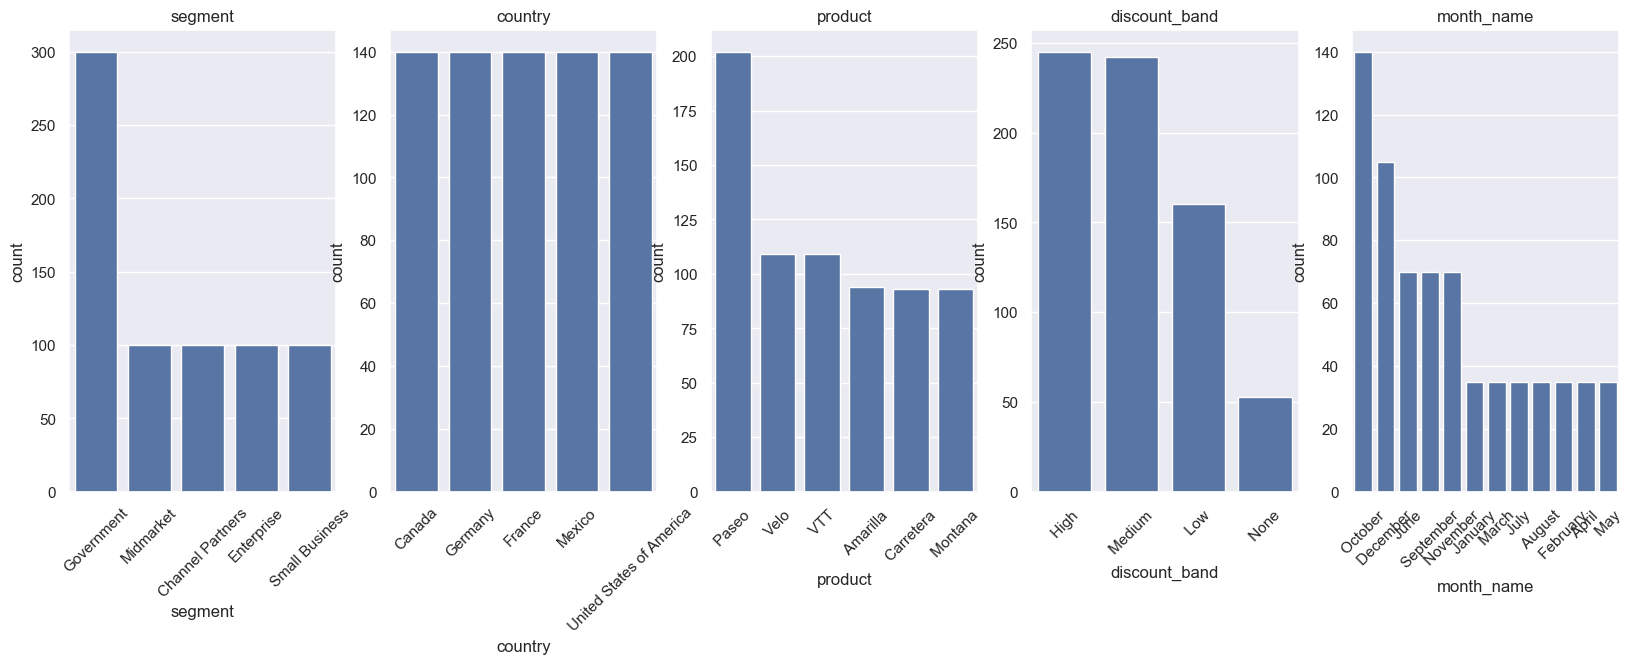

In [31]:
custom_palette = sns.color_palette("Set2")
palette = sns.color_palette()
fig, ax = plt.subplots(1,len(cat_col), figsize=(20, 6))
fig.subplots_adjust(hspace = 0.5)
for i, col in enumerate(cat_col):
    sns.countplot(ax=ax[i], x=col, data=data,
                  order=data[col].value_counts().index)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=45)
plt.show()

#### Análisis de variables numericas

In [32]:
def analize(data):
    results = []
    for column in data.columns:
        col_data = data[column]
        n = len(col_data)
        
        #Coeficiente de asimetria
        Kp = 3 * (np.mean(col_data) - np.median(col_data)) / np.std(col_data)
        Q1, Q3 = np.percentile(col_data, [25, 75])
        Kb = (Q3 + Q1 - 2 * np.median(col_data)) / (Q3 - Q1)
        A3 = skew(col_data)
        
        #Coeficiente de curtosis
        A4 = kurtosis(col_data)
        
        # Pruebas de normalidad
        shapiro_test = shapiro(col_data)
        ks_test = kstest(col_data, 'norm', args=(np.mean(col_data), np.std(col_data)))
        
        results.append([
            column,
            Kp, Kb, A3,
            A4,
            shapiro_test.pvalue, ks_test.pvalue
        ])
        
            # Crear el DataFrame
    columns = pd.MultiIndex.from_tuples([
        ('', 'Variable'),
        ('Prueba de asimetría', 'Pearson Kp'),
        ('Prueba de asimetría', 'Bowley Kb'),
        ('Prueba de asimetría', 'Fisher A3'),
        ('Prueba de curtosis', 'Fisher A4'),
        ('Prueba de normalidad', 'Shapiro-Wilk p-value'),
        ('Prueba de normalidad', 'Kolmogorov-Smirnov p-value')
    ])
    

    results_df = pd.DataFrame(results, columns=columns)
    return results_df

In [48]:
data_numeric = data.select_dtypes(exclude='object')

analize(data_numeric)

Prueba de asimetría                      \
              Variable          Pearson Kp Bowley Kb Fisher A3   
0           units_sold            0.227712  0.037100  0.435218   
1  manufacturing_price            2.390522  0.959184  0.591313   
2           sale_price            2.160451  0.944444  0.769628   
3          gross_sales            1.709451  0.842617  1.670333   
4            discounts                 NaN       NaN       NaN   
5                sales            1.700251  0.839998  1.692658   
6                 cogs            1.810854  0.873875  1.545726   
7               profit                 NaN       NaN       NaN   
8         month_number           -0.977805 -0.444444 -0.577052   
9                 year           -1.732051 -1.000000 -1.154701   

  Prueba de curtosis Prueba de normalidad                             
           Fisher A4 Shapiro-Wilk p-value Kolmogorov-Smirnov p-value  
0          -0.321629         7.461945e-11               2.774708e-02  
1          -1.427335         1.623808e-32               2.220851e-73  
2          -1.176959         1.544574e-32               7.423847e-71  
3           2.031097         1.926938e-32               3.517149e-42  
4                NaN                  NaN                        NaN  
5           2.164472         1.694194e-32               1.957803e-42  
6           1.588438         5.713478e-32               1.135389e-47  
7                NaN                  NaN                        NaN  
8          -0.881452         1.426135e-20               5.172326e-21  
9          -0.666667         3.149122e-39              3.632824e-141

In [41]:

def analyze_data(data):
    # Iterar sobre cada columna numérica en el DataFrame
    #colors = ['#c1121f','#669bbc', '#f4d35e', '#e9724c', '#ffc857']
    for column in data.select_dtypes(include='number').columns:
        fig, axes = plt.subplots(1, 4, figsize=(15, 5))
        fig.suptitle(f'Análisis de {column}', fontsize=16)
        #Pruebas de Asmetria y coutosis
        mean = data[column].mean()
        median = data[column].median()
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        var = data[column].var()
        std = data[column].std()
        mod = data[column].mode().iloc[0]
        Kp = 3 * (np.mean(data[column]) - np.median(data[column])) / np.std(data[column])
        A4 = kurtosis(data[column])
        # Histograma
        sns.histplot(data[column], bins=30, kde=True, ax=axes[0])
        axes[0].set_title('Histograma')
        axes[0].set_ylabel("")
        axes[0].set_xlabel("")
        axes[0].axvline(x=mean, color = "red", linestyle = "--",
                        label = f"Mean: {round(mean,2)}")
        axes[0].axvline(x = mod, color="#f4d35e", label = f"Mode: {round(mod,2)}")
        axes[0].legend()
        
        # Boxplot
        sns.boxplot(x=data[column], ax=axes[1])
        axes[1].set_title('Diagrama de caja')
        axes[1].set_xlabel("")
        axes[1].axvline(x=median, color= "red", linestyle= "--", label = f"Median: {round(median,2)}")
        axes[1].axvline(x=Q1, color= "#669bbc", label = f"Q1: {round(Q1,2)}")
        axes[1].axvline(x=Q3, color= "#f4d35e", label = f"Q3: {round(Q3,2)}")
        axes[1].legend()
        #kdeplot
        sns.kdeplot(data[column], fill= True,ax=axes[2], color= "#c1121f",
                    label =f"Var:{round(var,2)}\n Std:{round(std,3)}\n Asimetria Kp:{round(Kp,2)} \n Curtosis A4:{round(A4,2)}")
        axes[2].set_title('Kdeplot')
        axes[2].set_ylabel("")
        axes[2].set_xlabel("")
        axes[2].legend()

        
        # Scatter
        sns.scatterplot(x=data[column], y=range(len(data[column])), ax=axes[3])
        axes[3].set_title('Gráfico de dispersión')
        axes[3].set_xlabel("")
        axes[3].set_ylabel('')
        #x=range(len(data[column])), y=data[column]
        axes[3].set_title("Grafico de dispersion")
        # Mostrar los gráficos
        plt.tight_layout()
        plt.show()

In [49]:
data_numeric.head(2)

,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,month_number,year
0,1618.5,3.0,20.0,32370.0,NaN,32370.0,16185.0,16185.0,1,2014
1,1321.0,3.0,20.0,26420.0,NaN,26420.0,13210.0,13210.0,1,2014


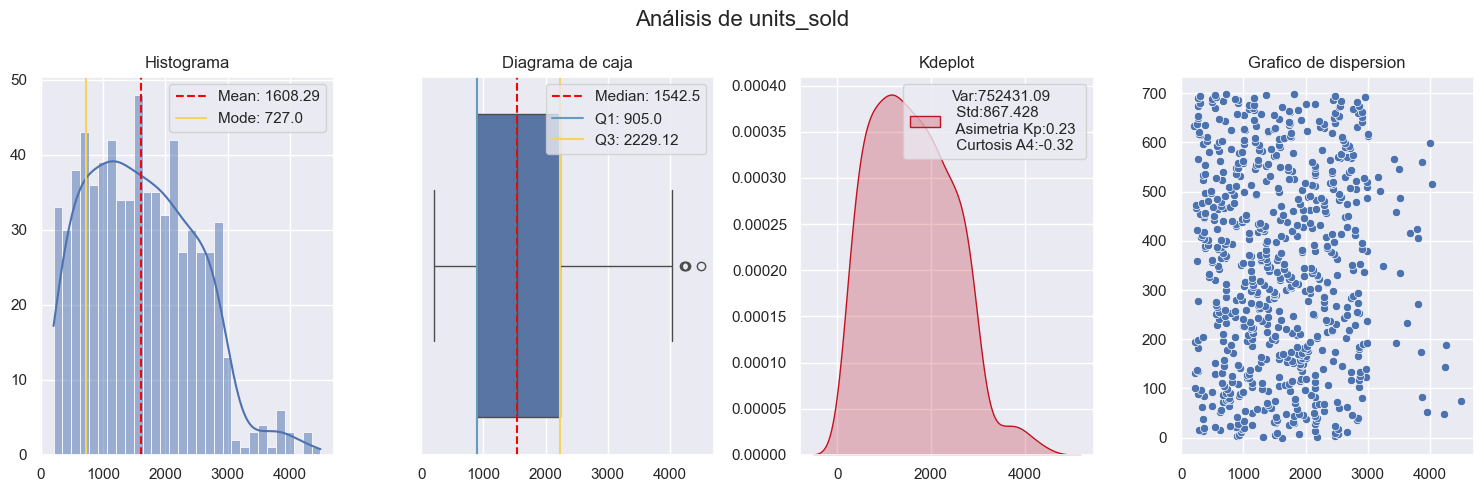

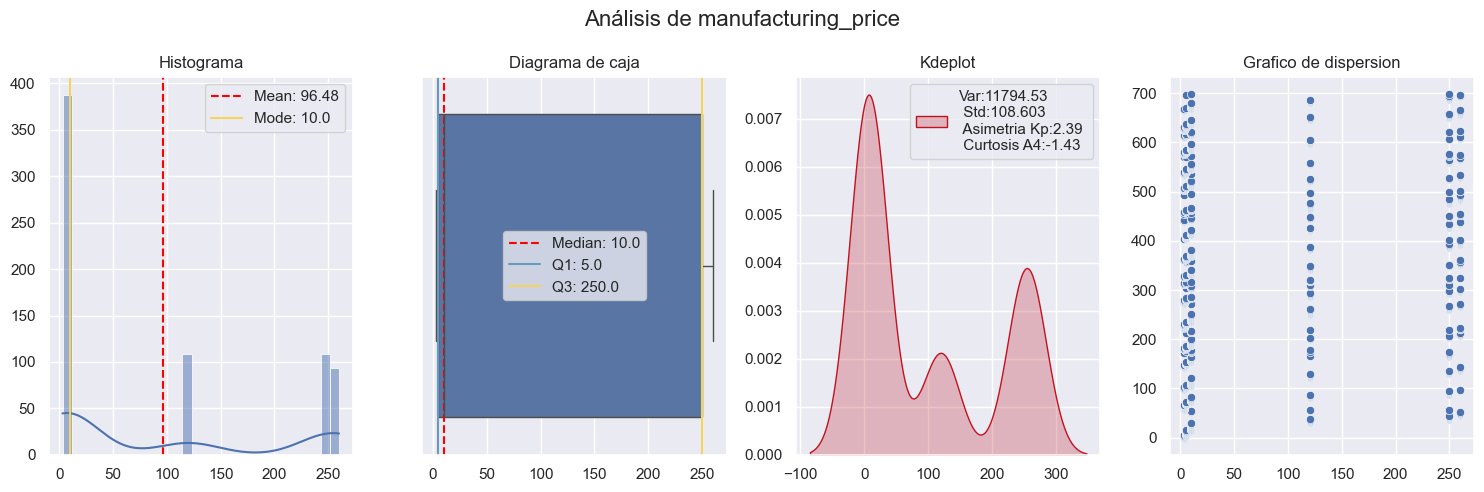

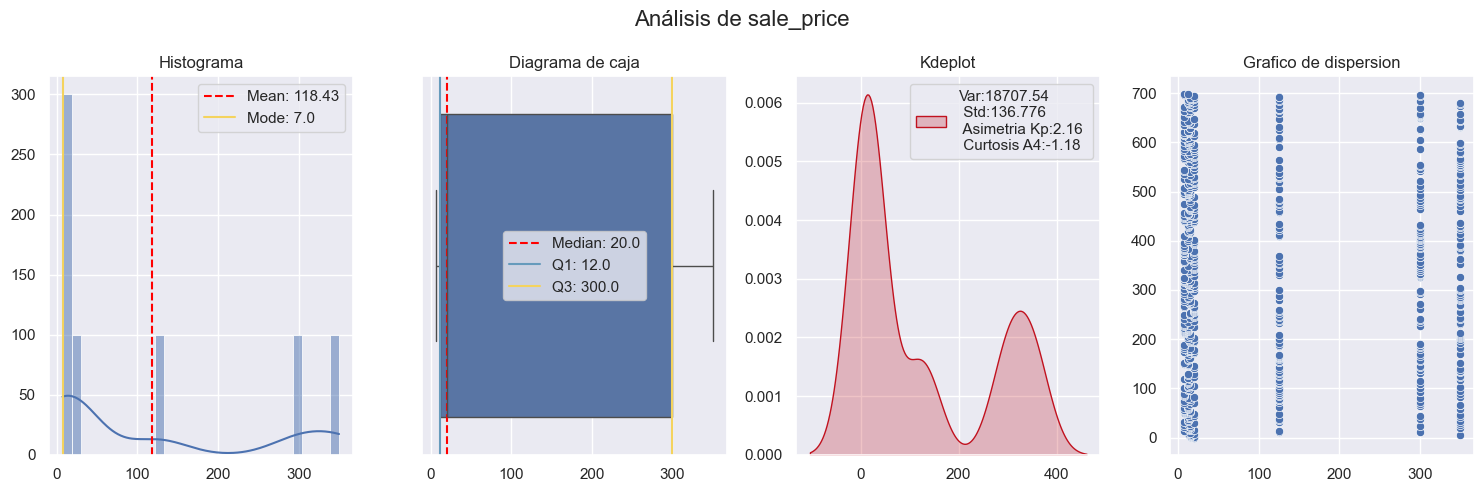

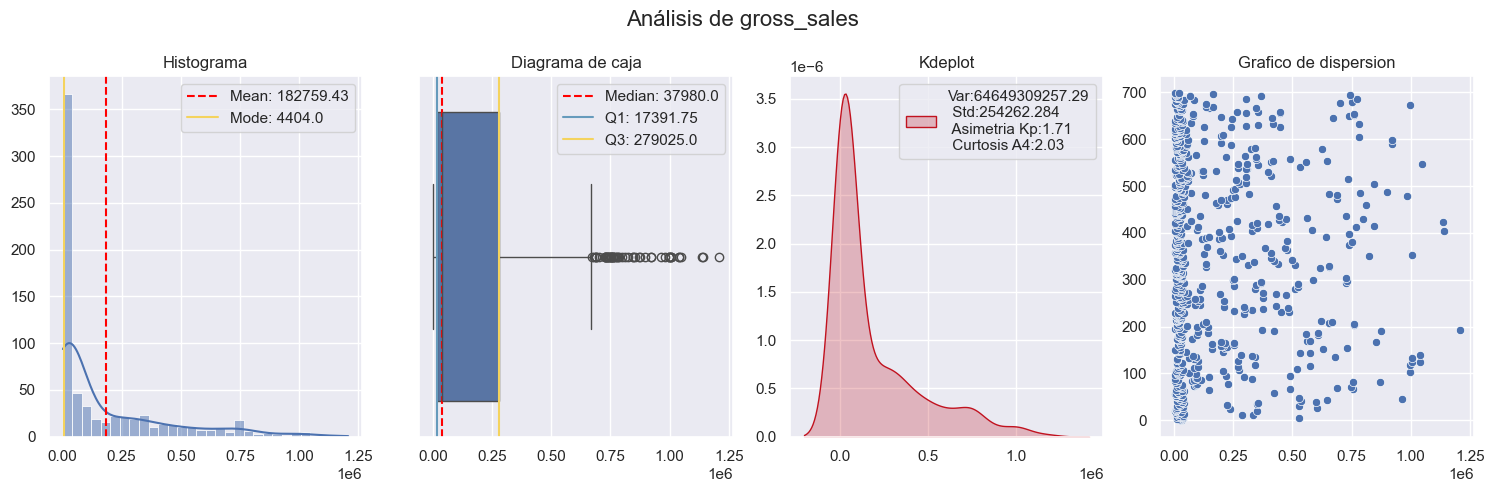

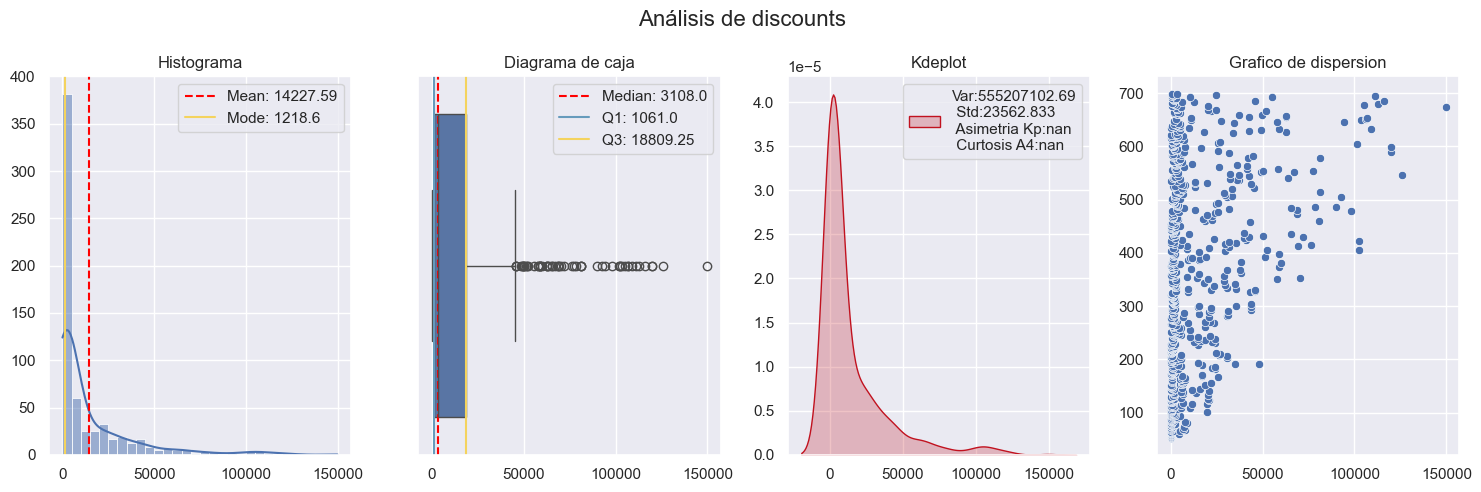

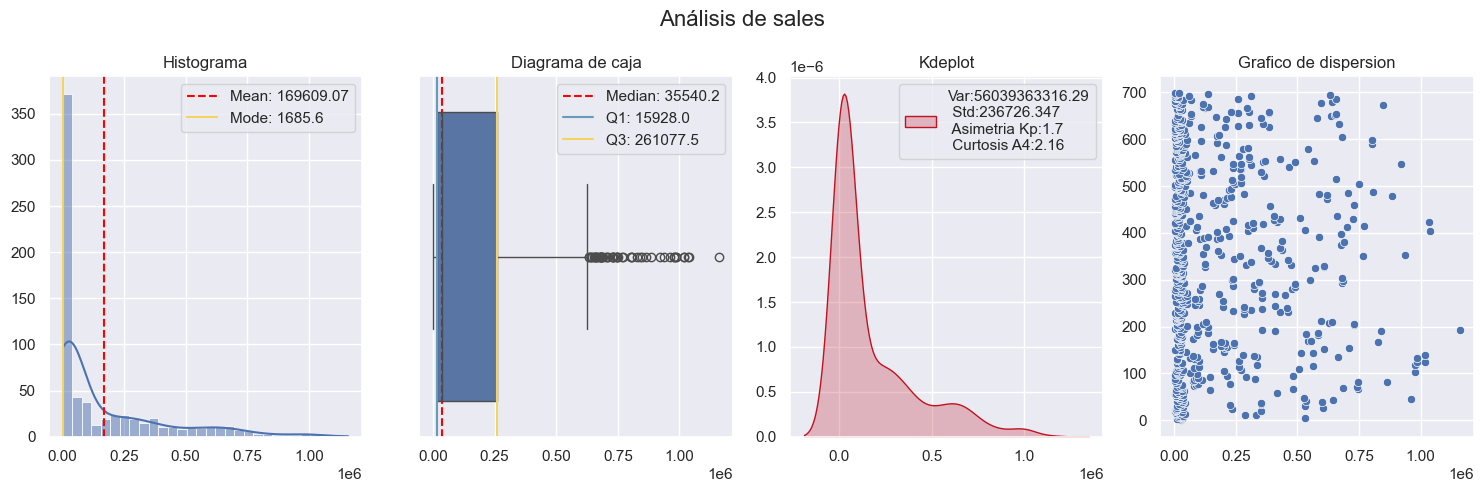

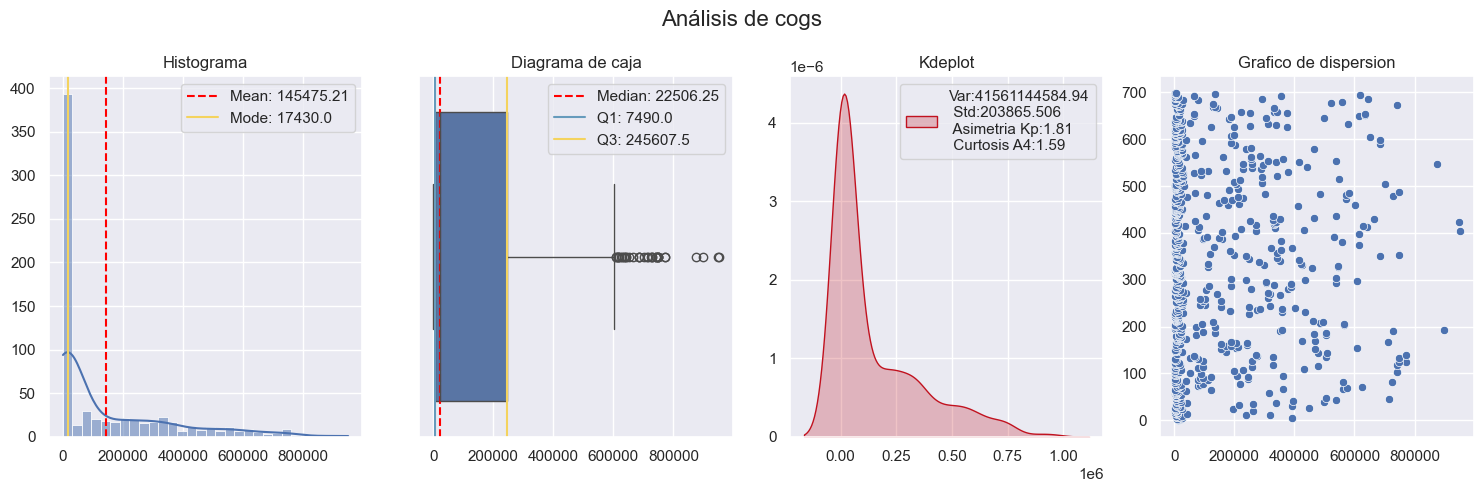

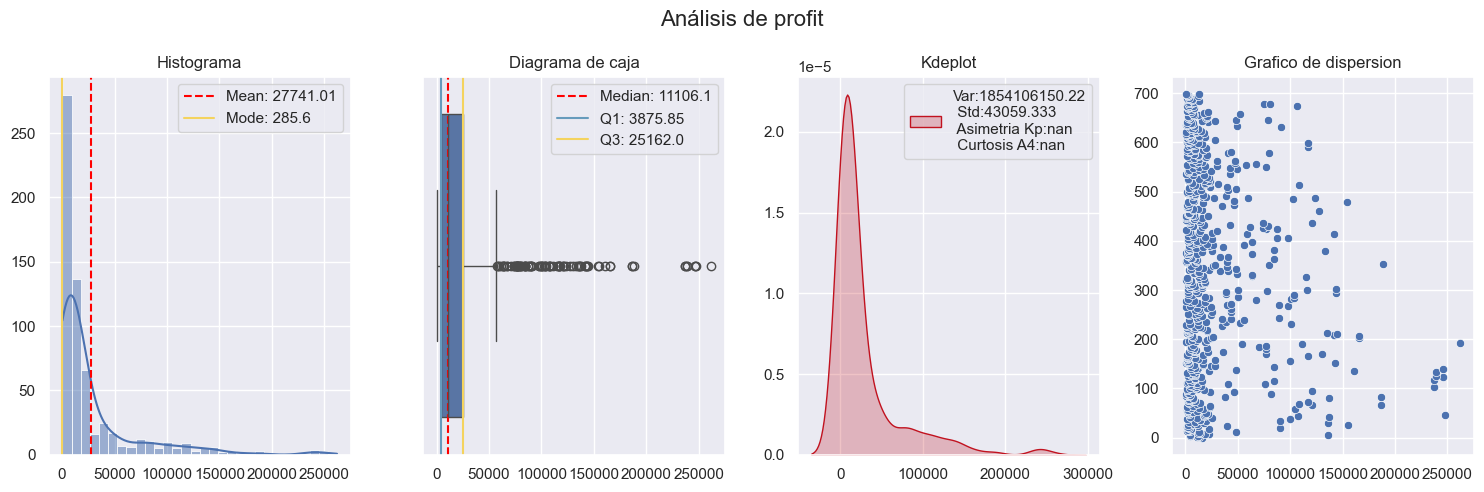

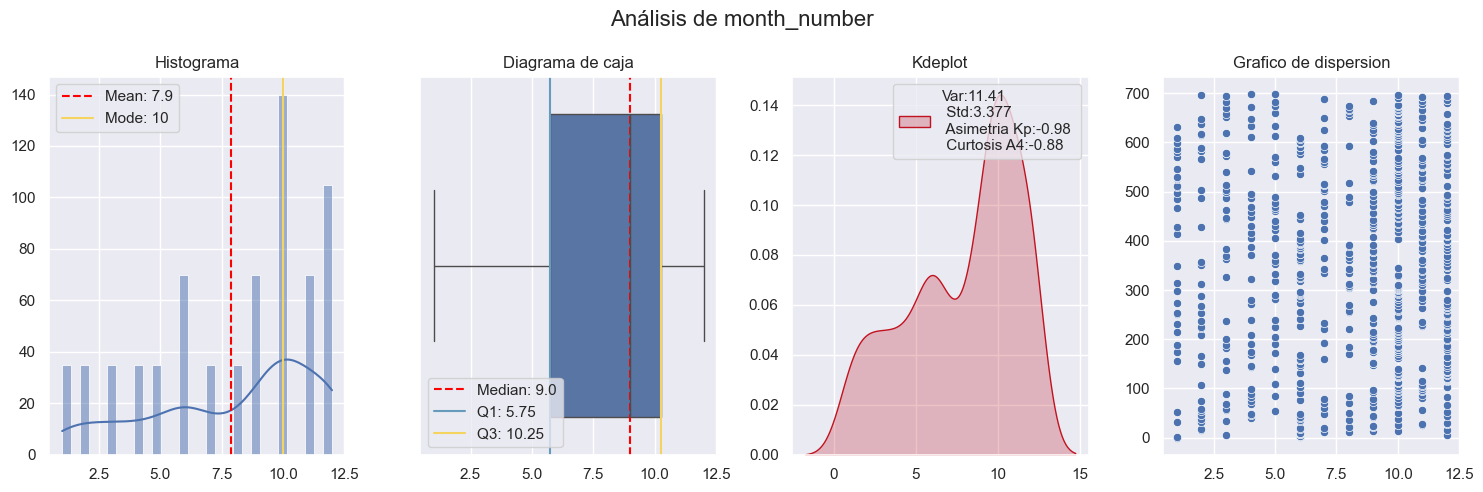

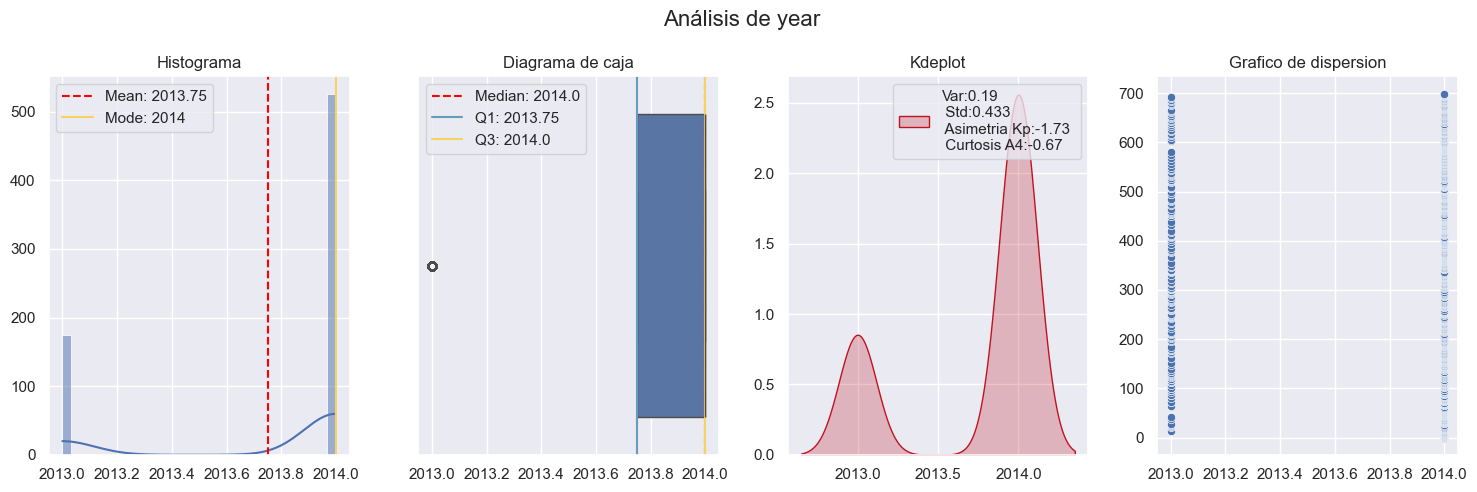

In [50]:

data_numeric_ =  pd.DataFrame(data_numeric)
analyze_data(data_numeric_)

### Analisis Bivariado

#### Analisis de datos numericos

In [5]:
print(cat_col)
print(num_col)

['segment', 'country', 'product', 'discount_band', 'month_name']
['units_sold', 'manufacturing_price', 'sale_price', 'gross_sales', 'discounts', 'sales', 'cogs', 'profit', 'date', 'month_number', 'year']


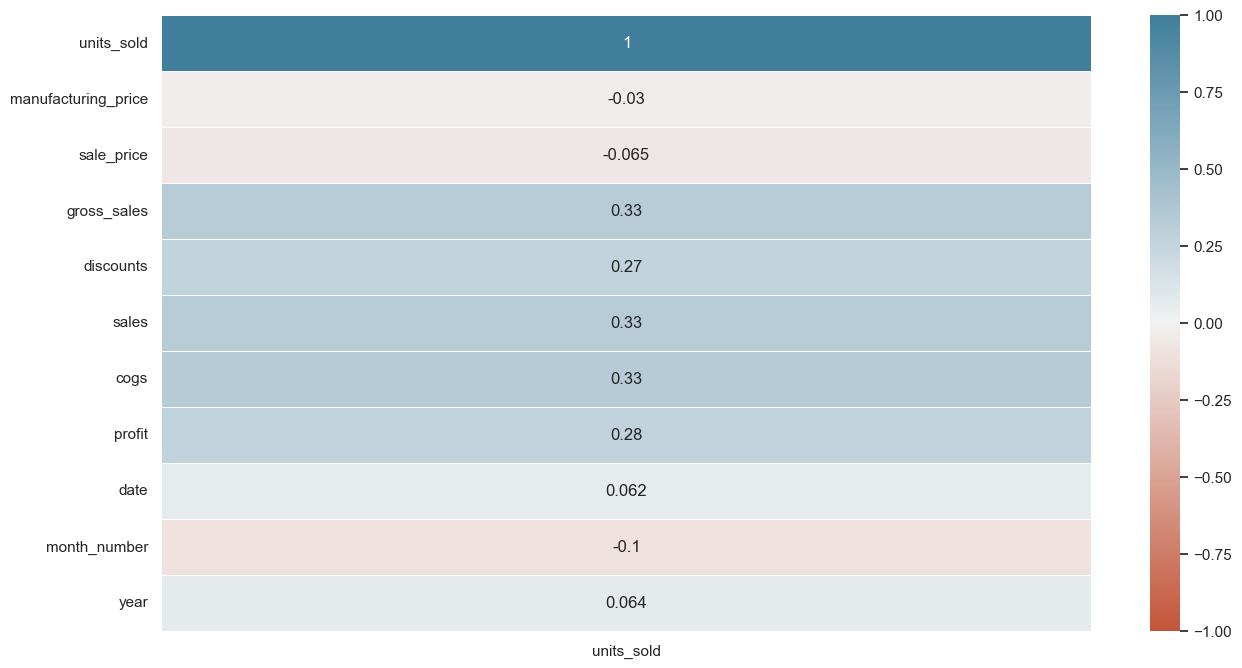

In [7]:
data_numeric = data.select_dtypes(exclude="object")
corr_matrix = data_numeric.corr()

# Seleccionar la columna de 'Life expectancy' y convertirla a un DataFrame
corr = corr_matrix[["units_sold"]]

# Configurar la figura del heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(
    data=corr,
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

plt.show()

In [10]:
def calcular_correlacion(data):
    
    # Calcular la correlación de Pearson para cada variable
    correlaciones = data.corr()["units_sold"].drop(labels=["units_sold"])
    df_correlacion = pd.DataFrame(correlaciones)
    
    # Crear un DataFrame con los resultados
    
    # Clasificar la correlación
    def clasificar_correlacion(r):
        if r == 1 or r == -1:
            return 'Correlación perfecta'
        elif 0.9 < r <= 1 or -1 <= r < -0.9:
            return 'Correlación excelente'
        elif 0.8 < r <= 0.9 or -0.9 < r <= -0.8:
            return 'Correlación aceptable'
        elif 0.6 < r <= 0.8 or -0.8 < r <= -0.6:
            return 'Correlación regular'
        elif 0.3 < r <= 0.6 or -0.6 < r <= -0.3:
            return 'Correlación mínima'
        else:
            return 'No hay correlación'

    df_correlacion['Clasificacion/Sperman'] = df_correlacion['units_sold'].apply(clasificar_correlacion)
    
    # Ordenar el DataFrame de mayor a menor correlación absoluta
    df_correlacion = df_correlacion.reindex(df_correlacion['units_sold'].abs().sort_values(ascending=False).index)
    
    return df_correlacion

In [11]:
calcular_correlacion(data_numeric)

,units_sold,Clasificacion/Sperman
cogs,0.331694,Correlación mínima
gross_sales,0.327221,Correlación mínima
sales,0.326914,Correlación mínima
profit,0.279973,No hay correlación
discounts,0.266142,No hay correlación
month_number,-0.103607,No hay correlación
sale_price,-0.065066,No hay correlación
year,0.063857,No hay correlación
date,0.062201,No hay correlación
manufacturing_price,-0.029644,No hay correlación


In [12]:
def plot_scatterplot(df, features, title='Features', columns=2, x_lim=None):
    df = df.copy()
    rows = math.ceil(len(features) / columns)
    
    fig, axes = plt.subplots(rows, columns, sharey=True, figsize=(14, 14))
    for i, feature in enumerate(features):
        ax = plt.subplot(rows, columns, i + 1)
        correlation = df[feature].corr(df['units_sold'])
        r_squared = correlation ** 2
        sns.scatterplot(data=df, x=feature, y='units_sold', ax=ax,
                        label = f"corr = {round(correlation, 2)} \n r^2 = {round(r_squared, 2)}")

    
    fig.suptitle(f'{title} x units_sold', fontsize=25, x=0.56)
    fig.tight_layout(rect=[0.05, 0.03, 1, 1])
    
    plt.show()

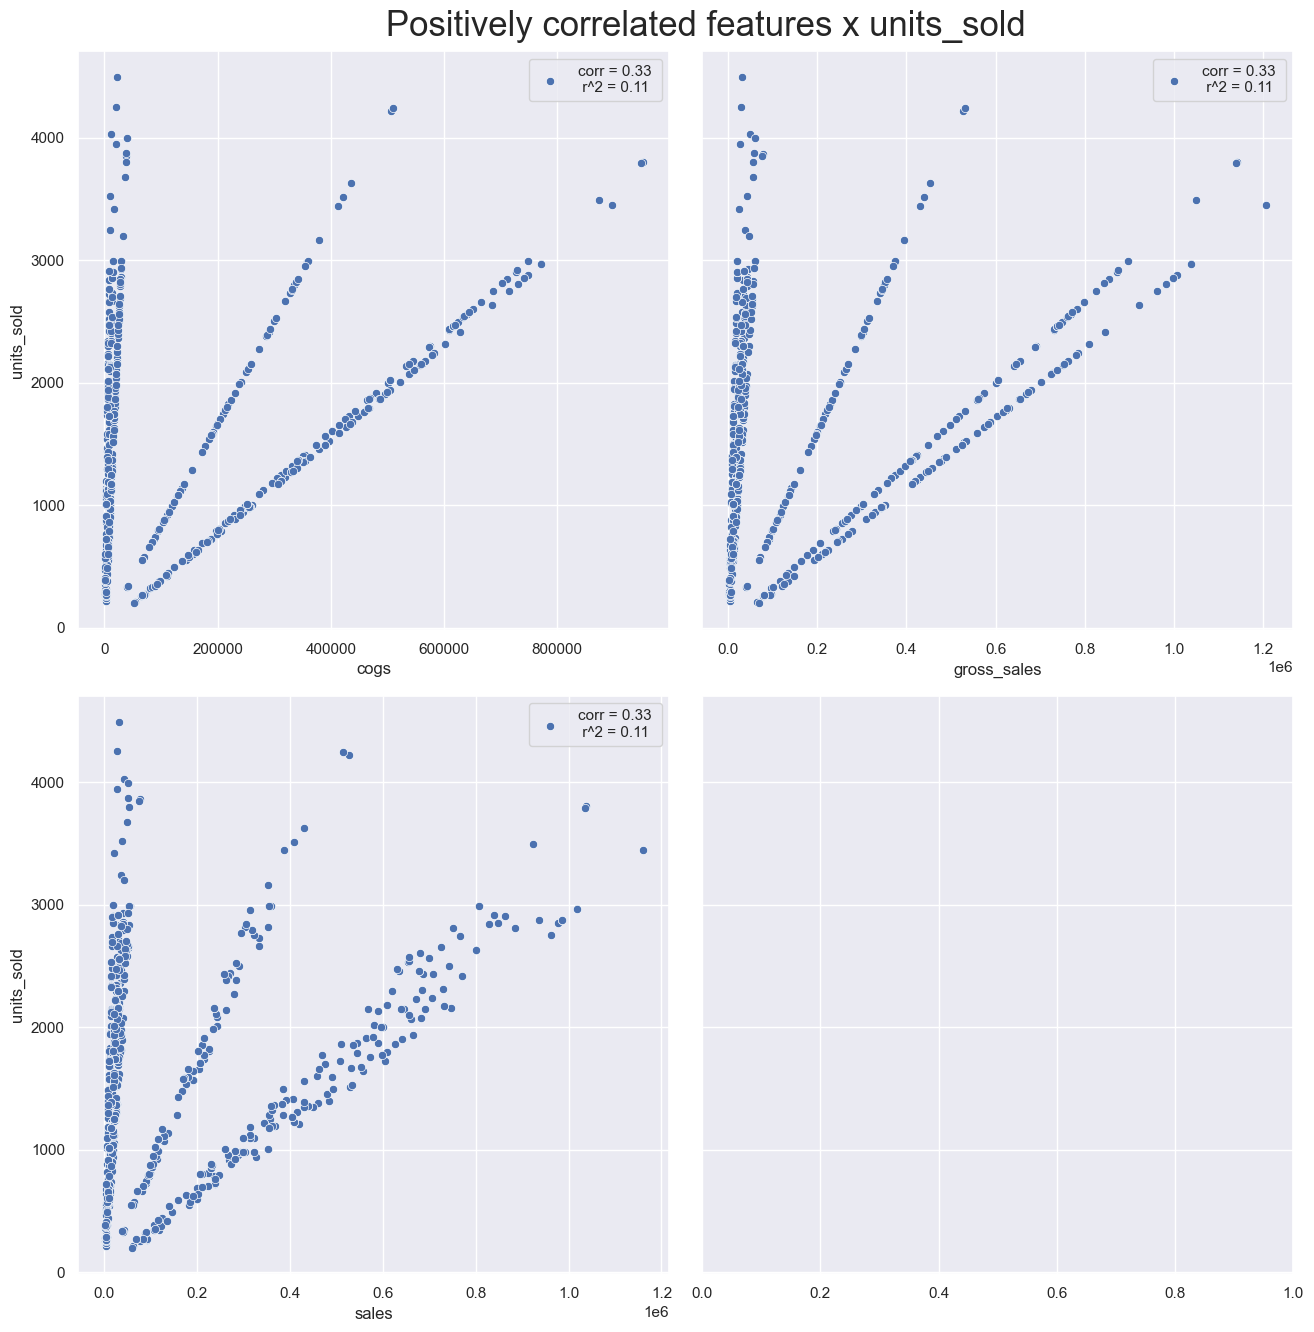

In [13]:
#Plot units_sold  x positively correlated features
pos_correlated_features = ['cogs','gross_sales', 'sales']

title = 'Positively correlated features'

plot_scatterplot(data, pos_correlated_features, title)

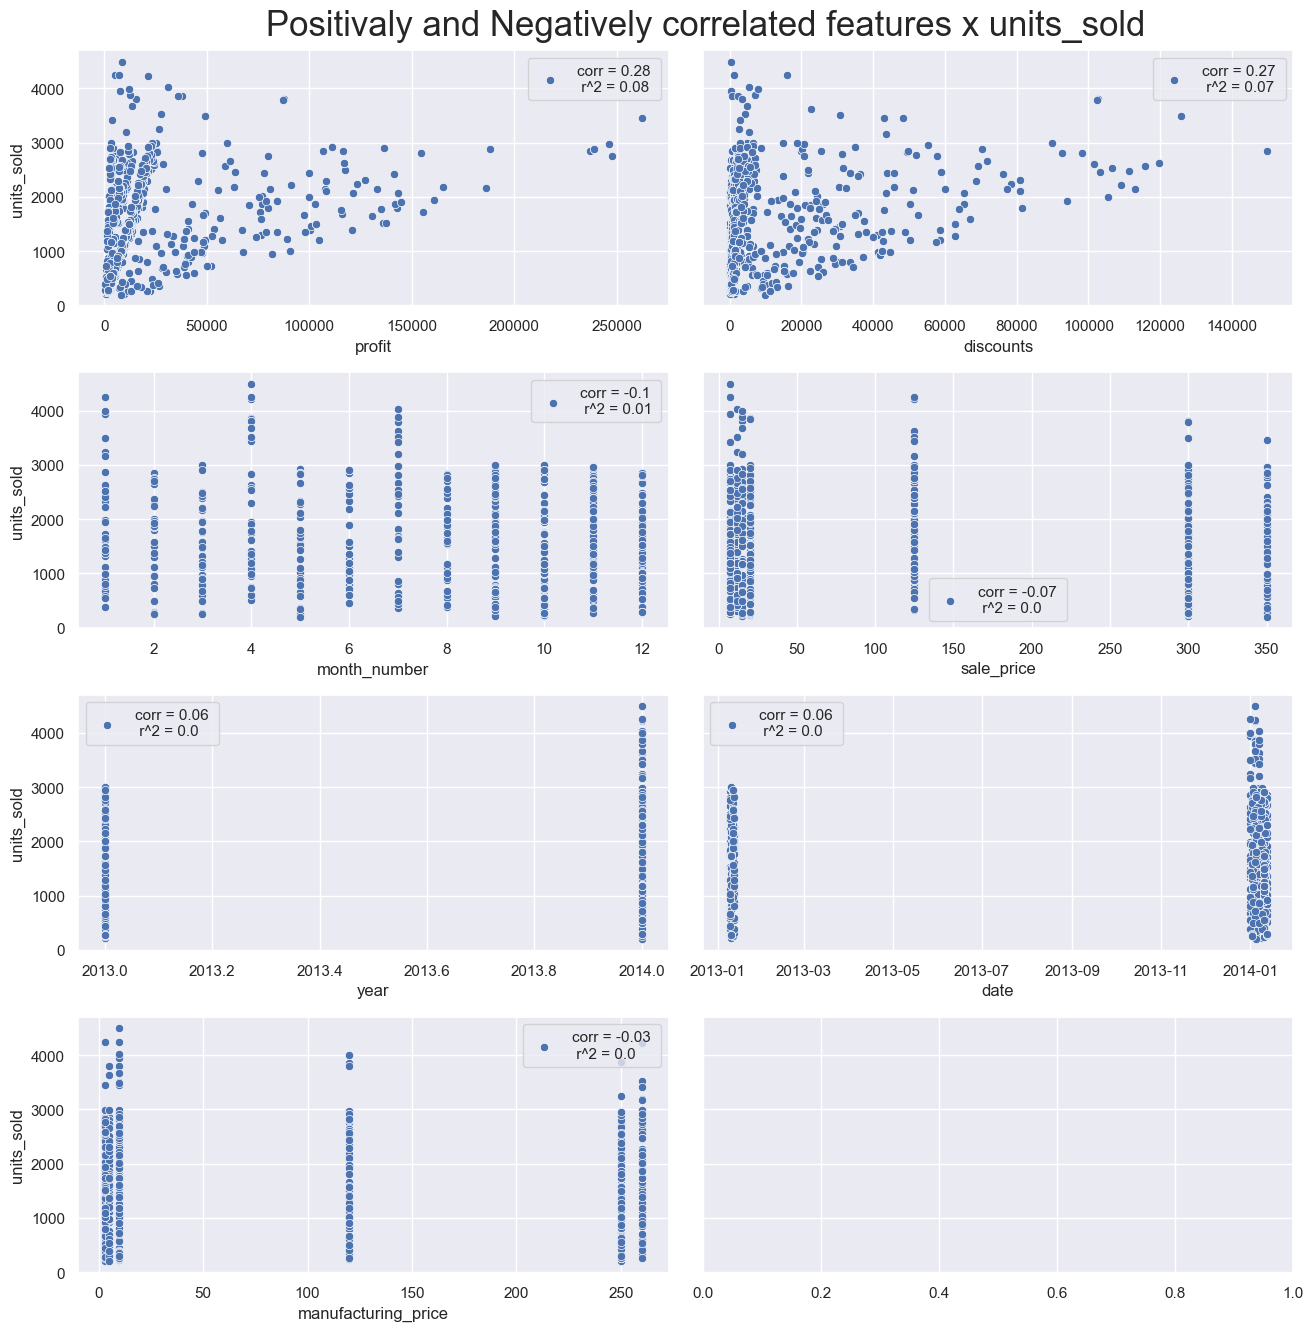

In [14]:
#Plot units_sold x positively correlated features and negatively correlated features
pos_correlated_features = ["profit","discounts", "month_number", "sale_price","year","date","manufacturing_price"]

title = 'Positivaly and Negatively correlated features'

plot_scatterplot(data, pos_correlated_features, title)

#### Analisis de variables categoricas

In [15]:
cat_col

['segment', 'country', 'product', 'discount_band', 'month_name']

Analizaremos cada variable categorica en base a discount_band

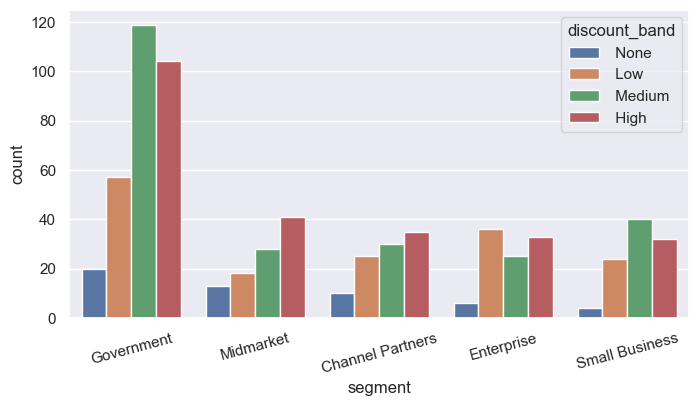

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(data= data, x = "segment", hue = "discount_band", order = data["segment"].value_counts().index)
plt.xticks(rotation=15)
plt.show()

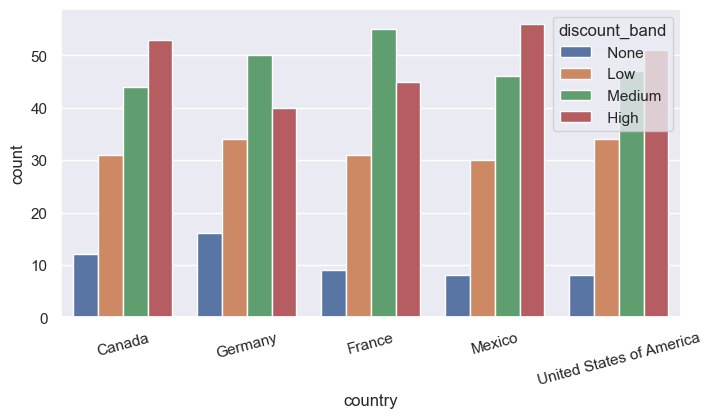

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(data= data, x = "country", hue = "discount_band", order = data["country"].value_counts().index)
plt.xticks(rotation=15)
plt.show()

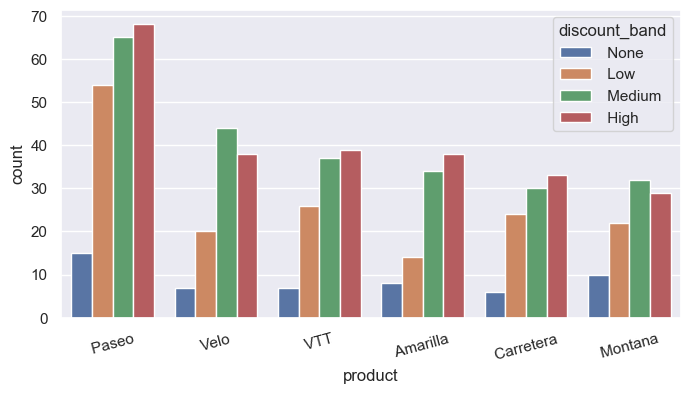

In [6]:
plt.figure(figsize=(8,4))
sns.countplot(data= data, x = "product", hue = "discount_band", order = data["product"].value_counts().index)
plt.xticks(rotation=15)
plt.show()

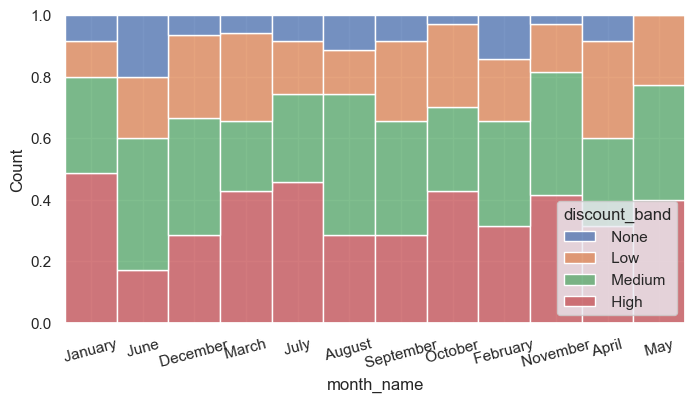

In [12]:
plt.figure(figsize=(8,4))
sns.histplot(data= data, x = "month_name", hue = "discount_band",multiple="fill")
plt.xticks(rotation=15)
plt.show()

### Análisis de variables mixtas (numericas y categoricas)

#### Analisis de la variable dependiente en funcion de una solo variable categorica

In [6]:
cat_col

['segment', 'country', 'product', 'discount_band', 'month_name']

Variable dependiente en funcion de segment

In [7]:
data["segment"].value_counts()

segment
Government          300
Midmarket           100
Channel Partners    100
Enterprise          100
Small Business      100
Name: count, dtype: int64

In [57]:
government = data.loc[data["segment"]=="Government"].copy()
midmarket = data.loc[data["segment"]=="Midmarket"].copy()
channel = data.loc[data["segment"] == "Channel Partners"].copy()
enterprise = data.loc[data["segment"] == "Enterprise"].copy()
small_business = data.loc[data["segment"] == "Small Business"].copy()
segments = ["Government", "Midmarket", "Channel Partners", "Enterprise", "Small Business"]

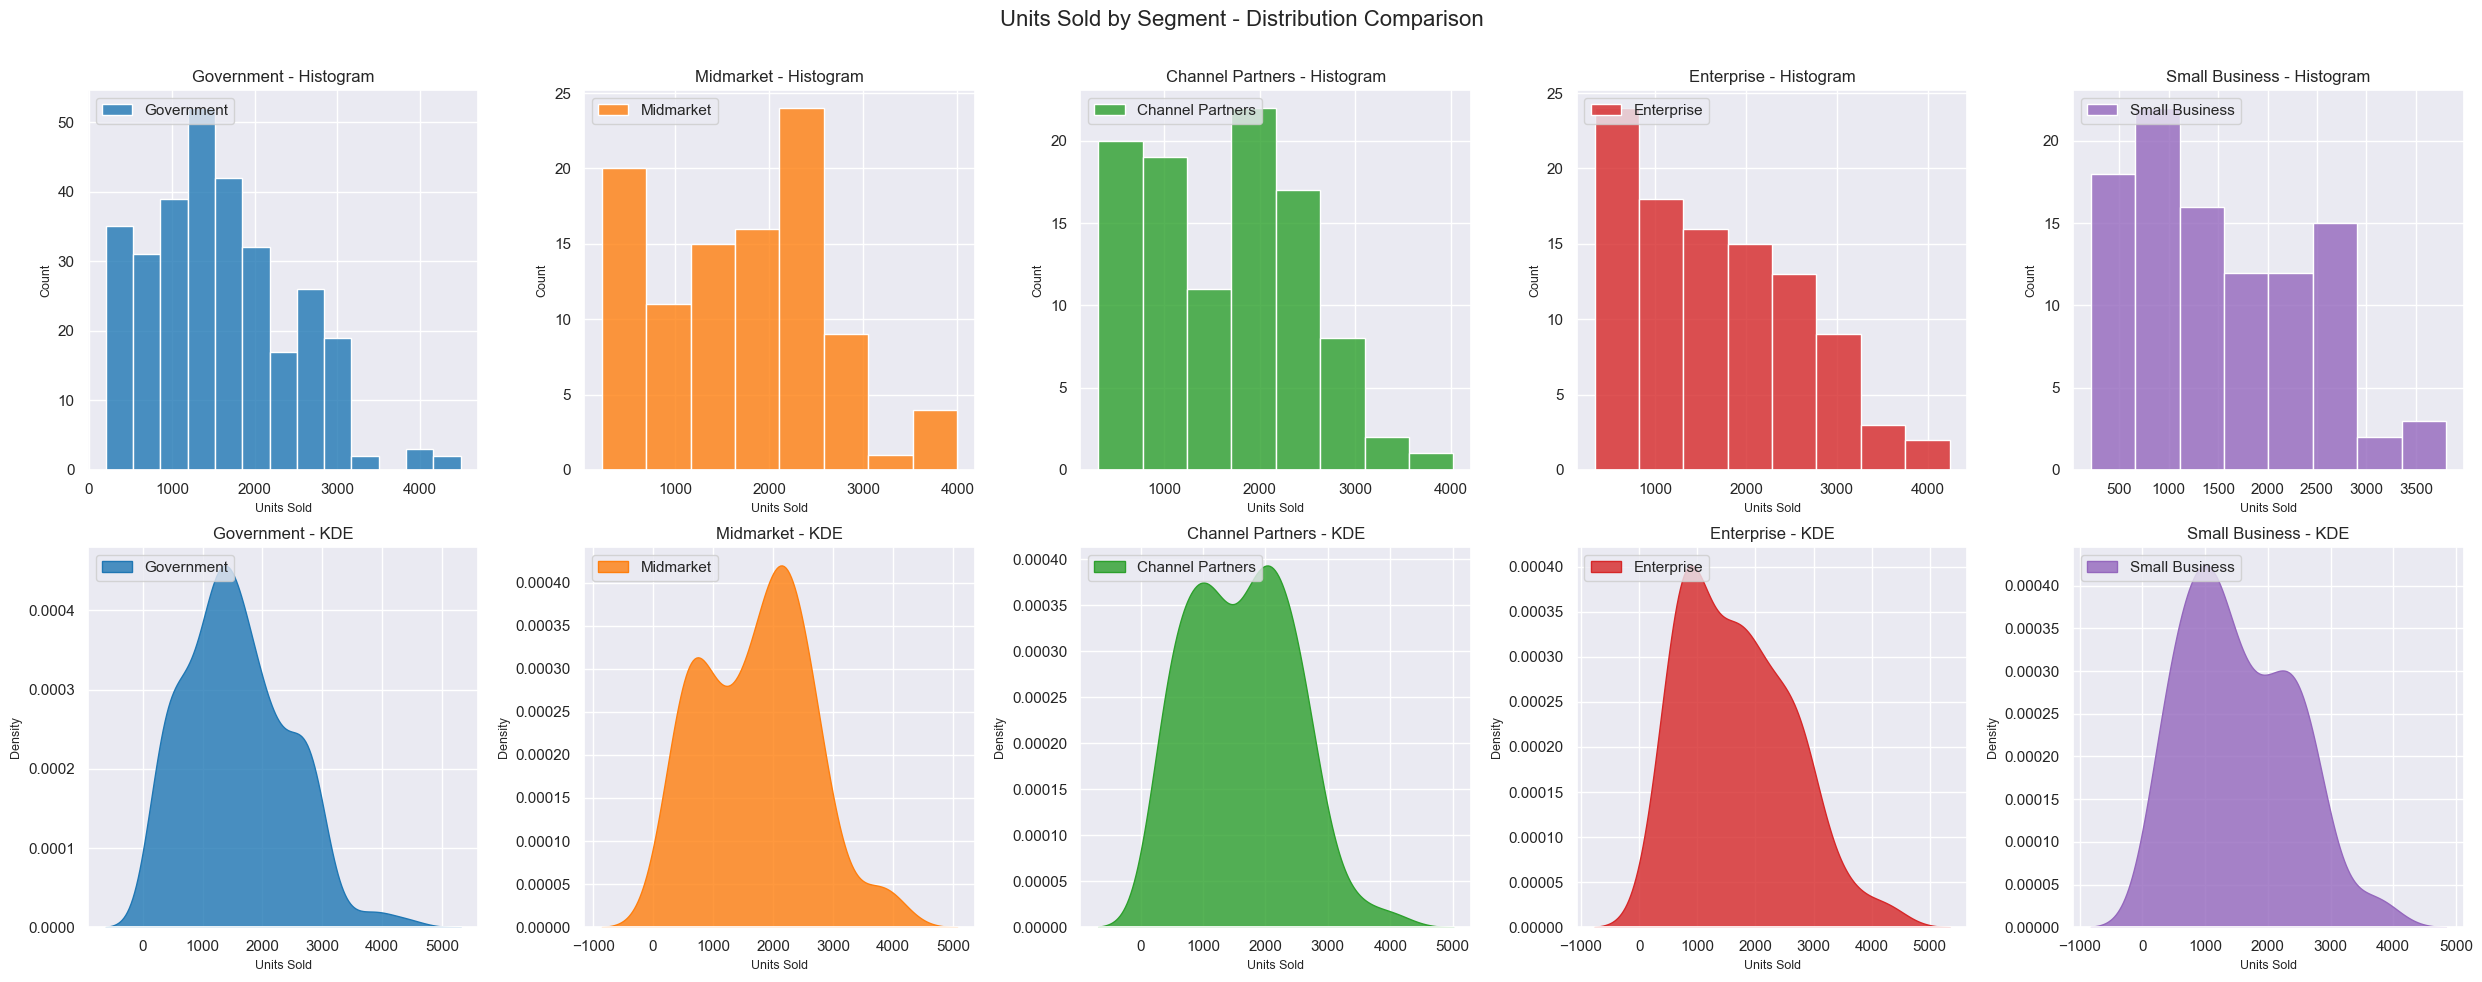

In [56]:
# Función para generar gráficos comparativos
def plot_grouped_distributions(data, group_column, target_column, group_values, colors, x_label, title_prefix, xlim=None):
    
    
    n_groups = len(group_values)  # Cantidad de grupos a analizar
    
    plt.figure(figsize=(5 * n_groups, 10))  # Ajusta el tamaño de la figura dinámicamente según los grupos
    
    # Histograma - Fila 1
    for i, group in enumerate(group_values):
        group_data = data.loc[data[group_column] == group].copy()
        plt.subplot(2, n_groups, i + 1)  # Subplot para la fila de histogramas
        sns.histplot(group_data[target_column], label=group, fill=True, color=colors[i], alpha=0.8)
        plt.title(f"{group} - Histogram")
        plt.xlabel(x_label, fontsize=9)
        plt.ylabel("Count", fontsize=9)
        if xlim:
            plt.xlim(xlim)
        plt.legend(loc="upper left")
    
    # KDE - Fila 2
    for i, group in enumerate(group_values):
        group_data = data.loc[data[group_column] == group].copy()
        plt.subplot(2, n_groups, n_groups + i + 1)  # Subplot para la fila de KDE
        sns.kdeplot(group_data[target_column], label=group, fill=True, color=colors[i], alpha=0.8)
        plt.title(f"{group} - KDE")
        plt.xlabel(x_label, fontsize=9)
        plt.ylabel("Density", fontsize=9)
        if xlim:
            plt.xlim(xlim)
        plt.legend(loc="upper left")
    
    plt.tight_layout()  # Ajusta los elementos de la gráfica para que no se superpongan
    plt.suptitle(f"{title_prefix} - Distribution Comparison", fontsize=16)  # Título general
    plt.subplots_adjust(top=0.9)  # Ajusta el espacio para el título general
    plt.show()

# Ejemplo 1: Uso para los segmentos 'segment'
segment_values = ["Government", "Midmarket", "Channel Partners", "Enterprise", "Small Business"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
plot_grouped_distributions(data, group_column="segment", target_column="units_sold", group_values=segment_values, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by Segment")


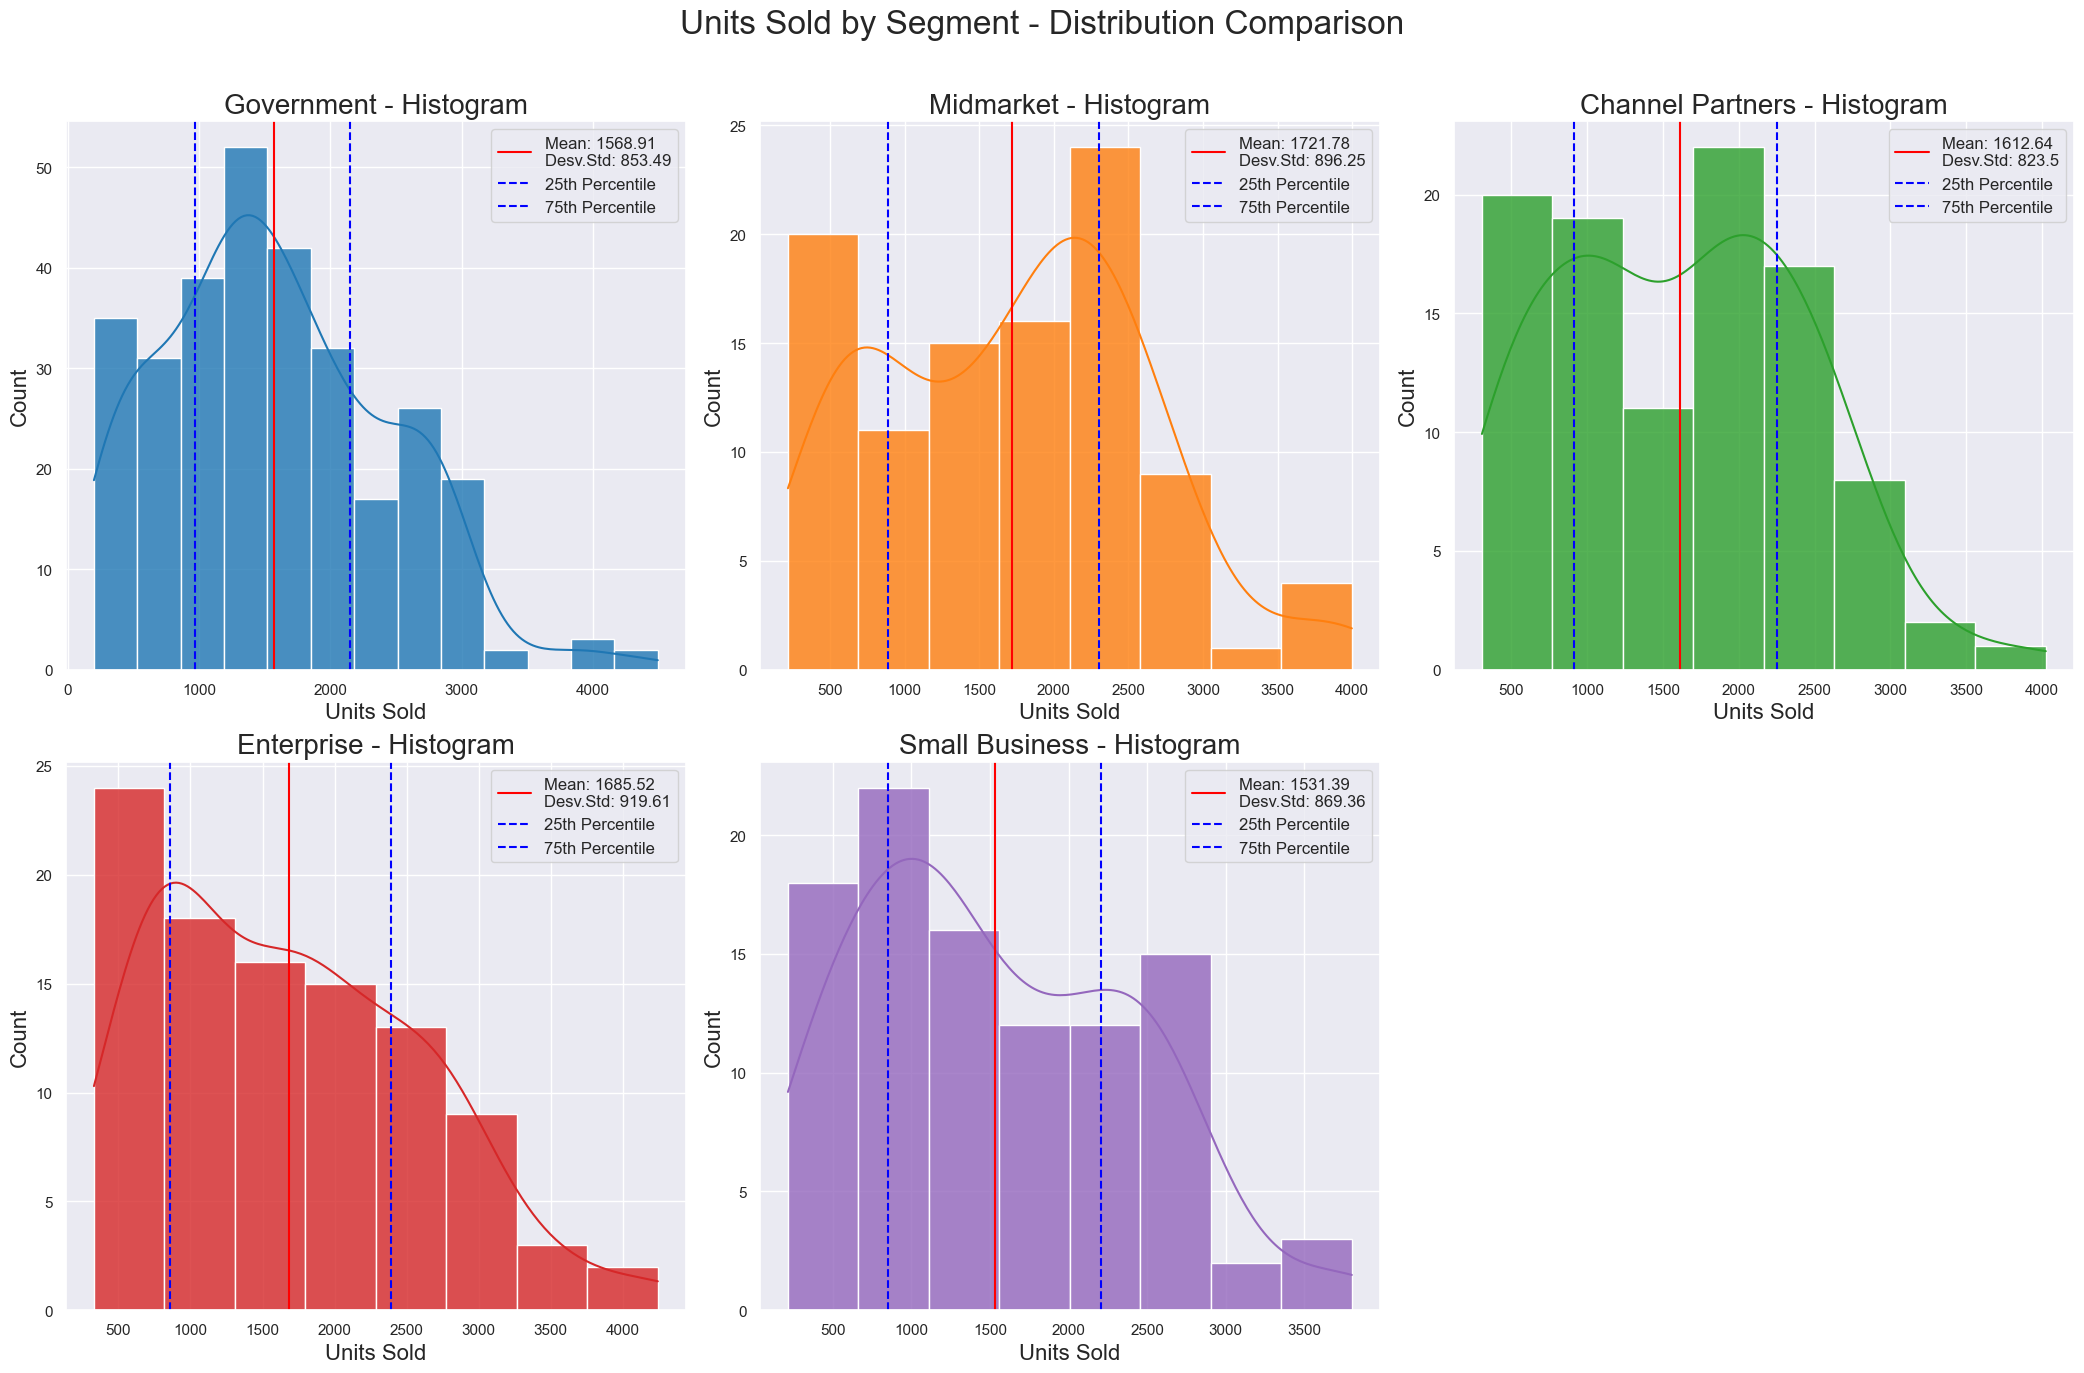

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Función para generar gráficos comparativos
def plot_grouped_distributions(data, group_column, target_column, group_values, colors, x_label, title_prefix, xlim=None):
    
    n_groups = len(group_values)  # Cantidad de grupos a analizar
    
    # Determinamos el número de filas (una para los primeros 3 gráficos, otra para el resto)
    n_cols = 3  # Número de gráficos por fila
    n_rows = (n_groups + n_cols - 1) // n_cols  # Calcula el número de filas necesarias

    plt.figure(figsize=(7 * n_cols, 7 * n_rows))  # Ajusta el tamaño de la figura dinámicamente según los grupos
    
    # Histograma - Ajuste en la cuadrícula 2 filas
    for i, group in enumerate(group_values):
        group_data = data.loc[data[group_column] == group].copy()
        plt.subplot(n_rows, n_cols, i + 1)  # Subplot organizado en filas y columnas
        sns.histplot(group_data[target_column], fill=True, color=colors[i], alpha=0.8, kde=True)
        plt.title(f"{group} - Histogram", fontsize=20)
        plt.xlabel(x_label, fontsize=16)
        plt.ylabel("Count", fontsize=16)
        if xlim:
            plt.xlim(xlim)
        
        # Añadir líneas verticales para la media y los percentiles
        mean = group_data[target_column].mean()
        desv_std = group_data[target_column].std()
        q25 = group_data[target_column].quantile(0.25)
        q75 = group_data[target_column].quantile(0.75)
        
        plt.axvline(x=mean, color="red", label=f"Mean: {round(mean, 2)}\nDesv.Std: {round(desv_std, 2)}")
        plt.axvline(x=q25, color="blue", linestyle="--", label="25th Percentile")
        plt.axvline(x=q75, color="blue", linestyle="--", label="75th Percentile")
        plt.legend(fontsize=12)
    
    plt.tight_layout()  # Ajusta los elementos de la gráfica para que no se superpongan
    plt.suptitle(f"{title_prefix} - Distribution Comparison", fontsize=24)  # Título general
    plt.subplots_adjust(top=0.9)  # Ajusta el espacio para el título general
    plt.show()

# Ejemplo 1: Uso para los segmentos 'segment'
segment_values = ["Government", "Midmarket", "Channel Partners", "Enterprise", "Small Business"]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Llamada a la función
plot_grouped_distributions(data, group_column="segment", target_column="units_sold", group_values=segment_values, 
                           colors=colors, x_label="Units Sold", title_prefix="Units Sold by Segment")


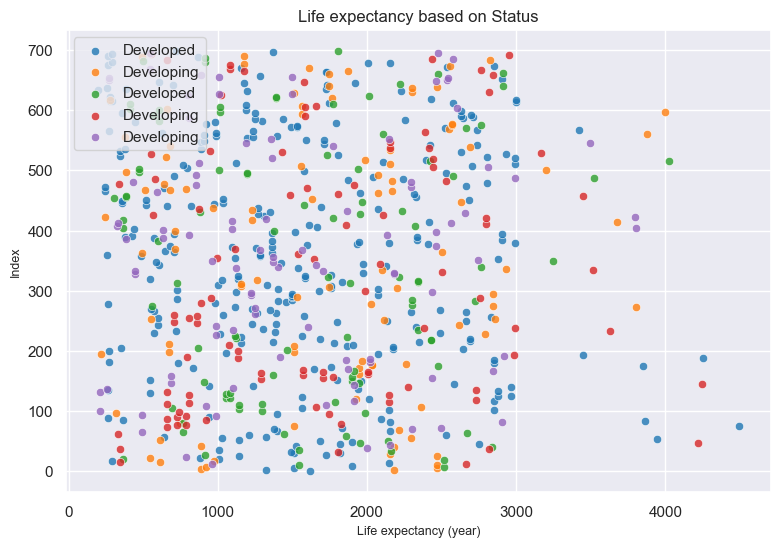

In [60]:
plt.figure(figsize=(20, 6))
government = data.loc[data["segment"]=="Government"].copy()
midmarket = data.loc[data["segment"]=="Midmarket"].copy()
channel = data.loc[data["segment"] == "Channel Partners"].copy()
enterprise = data.loc[data["segment"] == "Enterprise"].copy()
small_business = data.loc[data["segment"] == "Small Business"].copy()
segments = ["Government", "Midmarket", "Channel Partners", "Enterprise", "Small Business"]

# Histograma
plt.subplot(1, 2, 1)
sns.scatterplot(x=government["units_sold"], y=government.index, label="Developed", color=colors[0], alpha=0.8)
sns.scatterplot(x=midmarket["units_sold"], y=midmarket.index, label="Developing", color=colors[1], alpha=0.8)
sns.scatterplot(x=channel["units_sold"], y=channel.index, label="Developed", color=colors[2], alpha=0.8)
sns.scatterplot(x=enterprise["units_sold"], y=enterprise.index, label="Developing", color=colors[3], alpha=0.8)
sns.scatterplot(x=small_business["units_sold"], y=small_business.index, label="Developing", color=colors[4], alpha=0.8)
plt.legend(loc="upper left")
plt.ylabel("Index", fontsize=9)  # Cambié 'Density' a 'Index'
plt.title("Life expectancy based on Status")
plt.xlabel("Life expectancy (year)", fontsize=9)

plt.show()

Variable dependiente en funcion de country

In [61]:
data["country"].value_counts()

country
Canada                      140
Germany                     140
France                      140
Mexico                      140
United States of America    140
Name: count, dtype: int64

#### Análisis de la variable dependiente con dos o mas variables categoricas

#### Análisis de la variable dependiente con variable categorica y varaibles numericas

#### Analisis de De varaibles categoricas y numericas sin la varaiable dependiente

### Analisis de series de tiempo